The datafile TrainExer65 contains yearly data on industrial production (IP) in the USA and on the Composite
Leading Index (CLI), both in logarithms. The example in Lecture 6.5 considered monthly data, and now we consider
yearly data, both for the two log-series and for their first differences that correspond to the yearly growth rates. The
main question of interest is whether past values of the growth rate in CLI have predictive power for future growth
rates of IP. We denote the yearly growth rates by GIP = ∆log(IP) and GCLI = ∆log(CLI).
Note: In all questions, use 1960-2002 as estimation and test sample, and use 2003-2007 as hold-out forecast
evaluation sample. That is, the data for 2003-2007 are nowhere used to estimate models or to perform tests, and
these data are only used for forecast comparison in parts (e-g).

#### Question(a) 
Make time series plots of log(IP) and log(CLI), and also of the yearly growth rates GIP and GCLI. What
conclusions do you draw from these plots?

In [1]:
%matplotlib inline
import sys
sys.path.append('/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3')
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from xforex.BackTesting.econometrics_tools import Econometrics_Tool
import numpy as np
import pprint as pp
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.ar_model import AR
import pandas 

dat = pd.read_csv(
        '/Users/CJ/Documents/bitbucket/xforex_v1/xforex_v3/training/econometrics/week6-time-series/TrainExer65.txt',sep = '\t')
# dat.columns = ['YEAR','LOGIP','LOGCLI','GIP','GCLI']

dat.describe()

,YEAR,LOGIP,LOGCLI,GIP,GCLI
count,48.00,48.000000,48.000000,48.000000,48.000000
mean,1983.50,4.100628,4.045164,0.030241,0.024535
std,14.00,0.405069,0.334690,0.045182,0.052205
min,1960.00,3.207248,3.437208,-0.087810,-0.157734
25%,1971.75,3.831335,3.784190,0.010241,-0.013091
50%,1983.50,4.088133,3.960697,0.033641,0.034826
75%,1995.25,4.416749,4.309325,0.059519,0.052896
max,2007.00,4.722438,4.648230,0.118039,0.114645


perhaps cointegration?
stationary?


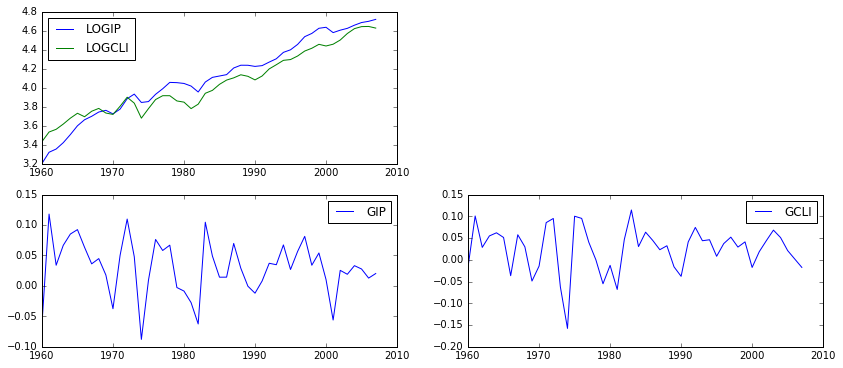

In [2]:
plt.figure(1, figsize=(14, 6))
plt.subplot(2,2,1)
plt.plot(dat['YEAR'],dat['LOGIP'],label = 'LOGIP')
plt.plot(dat['YEAR'],dat['LOGCLI'],label = 'LOGCLI')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(dat['YEAR'],dat['GIP'],label = 'GIP')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(dat['YEAR'],dat['GCLI'],label = 'GCLI')
plt.legend(loc='best')

print 'perhaps cointegration?'
print 'stationary?'

#### Question(b)  
(i) Perform the Augmented Dickey-Fuller (ADF) test for log(IP). In the ADF test equation, include (among
others) a constant (α), a deterministic trend term (βt), and two lags of GIP = ∆log(IP). 
Report the coefficient of log(IPt−1) and its standard error and t-value, and draw your conclusion.

(ii) Perform a similar ADF test for log(CLI).
Note that the 5% critical value differs from the usual one, see lecture 6.3


In [3]:
result = {}
result['LOGCLI'] = ts.adfuller(dat['LOGCLI'], regression = 'ct', maxlag = 2, autolag = None) # maxlag is now set to 1
result['LOGIP'] = ts.adfuller(dat['LOGIP'], regression = 'ct', maxlag = 2 , autolag = None) # maxlag is now set to 1
result['GCLI'] = ts.adfuller(dat['GCLI'], regression = 'c', maxlag = 3) # maxlag is now set to 1
result['GIP'] = ts.adfuller(dat['GIP'], regression = 'c', maxlag = 3 ) # maxlag is now set to 1
pp.pprint(result)

{'GCLI': (-6.7694955155160716,
          2.6641738968907438e-09,
          1,
          46,
          {'1%': -3.5812576580093696,
           '10%': -2.6015409829867675,
           '5%': -2.9267849124681518},
          -141.63651672371026),
 'GIP': (-5.316670620088729,
         5.0566574986640179e-06,
         1,
         46,
         {'1%': -3.5812576580093696,
          '10%': -2.6015409829867675,
          '5%': -2.9267849124681518},
         -155.4722336793966),
 'LOGCLI': (-1.8607359423507663,
            0.6747626050953115,
            2,
            45,
            {'1%': -4.1754607270233199,
             '10%': -3.186691646090535,
             '5%': -3.5130145980795611}),
 'LOGIP': (-3.8223080382643491,
           0.015464883585730409,
           2,
           45,
           {'1%': -4.1754607270233199,
            '10%': -3.186691646090535,
            '5%': -3.5130145980795611})}


#### Question(c) 
Perform the two-step Engle-Granger test for cointegration of the time series log(IP) and log(CLI). The secondstep
regression is of the type $$∆e_t = α + βt + ρe_{t−1} + β_1∆e_{t−1} + β_2∆e_{t−2} + ω_t$$
, where et are the residuals of
step 1. What is your conclusion?
Note that the 5% critical value differs from the usual one, see lecture 6.3

**ans:** p value = 0.62362808086207744, not significant at 5% level.
model_coint.resid is not stationary so x and y are not cointegration


In [4]:
# engle-Granger test on cointegration
model_coint = Econometrics_Tool().linear_fit(x = dat['LOGCLI'], y = dat['LOGIP'])
result['cointegration'] = ts.adfuller(model_coint.resid, regression = 'ct', maxlag = 2, autolag = None) # maxlag is now set to 1
pp.pprint(result['cointegration'])

(-1.9589064514569963,
 0.62362808086207744,
 2,
 45,
 {'1%': -4.1754607270233199,
  '10%': -3.186691646090535,
  '5%': -3.5130145980795611})


#### Question(d) 
Perform two F-tests, one for the Granger causality of GIP for GCLI and the other for the Granger causality of
GCLI for GIP. Include a constant and two lags of both variables in the test equations. Report the degrees of
freedom and the numerical values of the two F-tests, and draw your conclusion. The relevant 5% critical value
is 3.3.

In [5]:
print '\n\n***********************************************\n GIP => GCLI ????'
pp.pprint(ts.grangercausalitytests(dat[['GCLI', 'GIP']], maxlag= 2))

print '\n\n***********************************************\n GCLI => GIP????'
pp.pprint(ts.grangercausalitytests(dat[['GIP', 'GCLI']], maxlag= 2))



***********************************************
 GIP => GCLI ????

Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=19.3301 , p=0.0001  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=20.6480 , p=0.0000  , df=1
likelihood ratio test: chi2=17.1160 , p=0.0000  , df=1
parameter F test:         F=19.3301 , p=0.0001  , df_denom=44, df_num=1

Granger Causality
('number of lags (no zero)', 2)
ssr based F test:         F=3.1351  , p=0.0541  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=7.0348  , p=0.0297  , df=2
likelihood ratio test: chi2=6.5461  , p=0.0379  , df=2
parameter F test:         F=3.1351  , p=0.0541  , df_denom=41, df_num=2
{1: ({'lrtest': (17.11601252349584, 3.5164580057876654e-05, 1),
      'params_ftest': (19.330060962325803, 6.8639847782403542e-05, 44.0, 1),
      'ssr_chi2test': (20.64801966430257, 5.5194245649783322e-06, 1),
      'ssr_ftest': (19.330060962325813, 6.8639847782403312e-05, 44.0, 1)},
      array([[ 0.,  1.,  0.]])]),
 2

#### Question(e) 
Show that the coefficients of both lags in an AR(2) model for GIP are insignificant. Show also that even the
slope coefficient in the 
AR(1) model $$ GIP_t = α + βGIP_{t−1} + ε_t $$ 
is insignificant. Make two forecasts for GIP for the five years from 2003-2007, one from the AR(1) model and another from the simple model 
$$ GIP_t = α + ε_t $$

In [31]:
dates = dat['YEAR'].map(lambda x: datetime.strptime(str(x), '%Y'))
signal = pd.DataFrame({'GIP': dat['GIP']})
signal.index= pandas.Index(dates)
ar_mod2 = AR(signal[:'2002']).fit(maxlag=2)
ar_mod1 = AR(signal[:'2002']).fit(maxlag=1)
ar_mod0 = AR(signal[:'2002']).fit(maxlag=0)

print ar_mod2.pvalues
print ar_mod1.pvalues
print ar_mod1.predict('2003-01-01', '2007-01-01', dynamic=True)

print ar_mod0.pvalues
print ar_mod0.predict('2003-01-01', '2007-01-01', dynamic=True)
# print ar_res1.predict('2003-01-01', '2007-01-01', dynamic=True)


const     0.000964
L1.GIP    0.092944
L2.GIP    0.106898
dtype: float64
const     0.000446
L1.GIP    0.451921
dtype: float64
2003-01-01    0.032738
2004-01-01    0.033540
2005-01-01    0.033631
2006-01-01    0.033641
2007-01-01    0.033642
Freq: AS-JAN, dtype: float64
const    0.000019
dtype: float64
2003-01-01    0.031118
2004-01-01    0.031118
2005-01-01    0.031118
2006-01-01    0.031118
2007-01-01    0.031118
Freq: AS-JAN, dtype: float64


#### Question(f) 
Estimate the ADL(2,2) model $$GIP_t = α + β_1GIP_{t−1} + β_2GIP_{t−2} + γ_1GCLI_{t−1} + γ_2GCLI_{t−2} + ε_t $$
, and show by means of an F-test that the null hypothesis that β1 = β2 = γ2 = 0 is not rejected. Then estimate the ADL(0,1) model $$ GIP_t = α + γGCLI_{t−1} + ε_t $$and use this model to forecast GIP for the five years from 2003-2007.

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.tsatools import lagmat
import scipy
GIP2 = lagmat(dat['GIP'], maxlag=2, trim ='Both')
GCLI2 = lagmat(dat['GCLI'], maxlag=2, trim ='Both')


adl_dat = pd.DataFrame(columns=['GIP','GIPlag1', 'GIPlag2', 'GCLIlag1', 'GCLIlag2'])
dates = dat['YEAR'].map(lambda x: datetime.strptime(str(x), '%Y'))


adl_dat['GIP'] = dat['GIP'][2:]
adl_dat.index= pandas.Index(dates[2:])
adl_dat['GIPlag1'] = GIP2[:,0]
adl_dat['GIPlag2'] = GIP2[:,1]
adl_dat['GCLIlag1'] = GCLI2[:,0]
adl_dat['GCLIlag2'] = GCLI2[:,1]

X = sm.add_constant(adl_dat[['GIPlag1','GIPlag2','GCLIlag1','GCLIlag2']]['1960':'2002'])
y = adl_dat['GIP']['1960':'2002']
adl22 = sm.OLS(y,X).fit()

X = sm.add_constant(adl_dat[['GCLIlag1']]['1960':'2002'])
y = adl_dat.GIP['1960':'2002']
adl01 = sm.OLS(y,X).fit()

## f test:
g = 3
n=41 
k = 5
F_stat = (adl22.rsquared - adl01.rsquared)/g/((adl22.rsquared )/(n-k))
print F_stat
print scipy.stats.f.cdf(F_stat, g, n-k)
# don't reject the simple model


print adl01.predict(sm.add_constant(adl_dat[['GCLIlag1']]['2003':'2007']))


adl01.summary()

[ 0.04098514  0.05330444  0.04466013  0.02946193  0.01960802]
1.75962126526
0.827674509873


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GIP   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     25.52
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           1.06e-05
Time:                        13:32:08   Log-Likelihood:                 80.348
No. Observations:                  41   AIC:                            -156.7
Df Residuals:                      39   BIC:                            -153.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0186      0.006      3.102      0.004         0.006     0.031
GCLIlag1       0.5074      0.100      5.052      0.000         0.304     0.711
==============================================================================
Omnibus:                        0.839   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.785
Skew:                           0.031   Prob(JB):                        0.675
Kurtosis:                       2.325   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question(g) 
Compare the three series of forecasts of parts (e) and (f) by computing their values of the root mean squared
error (RMSE), mean absolute error (MAE), and the sum of the forecast errors (SUM). Check that it seems
quite difficult to forecast the IP growth rates for 2003-2007 from models estimated from 1960-2002. Can you
think of possible reasons why this is the case?

0.0128514633989
0.0107354166546
0.0536770832729


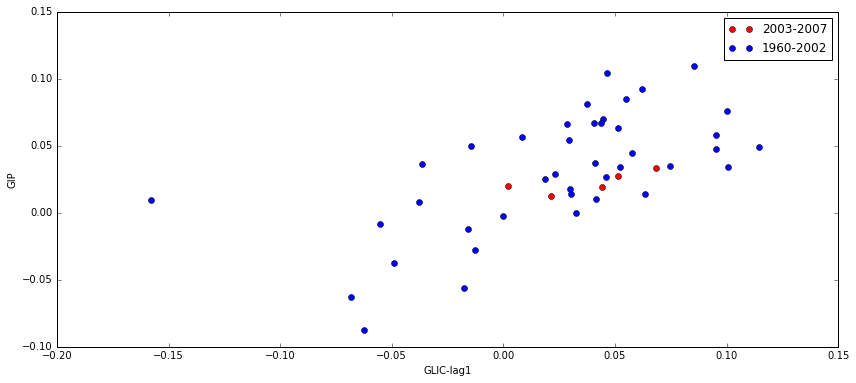

In [98]:
import math
def rmse(y_fitted, y_true):
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return math.sqrt(sum((sub)**2)/len(y_fitted))
def mae(y_fitted, y_true):
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return sum(abs(sub)/len(y_fitted))

def SumOfError(y_fitted, y_true):
    '''
    sum of forcast errors
    '''
    sub = np.array([a-b for a,b in zip(y_fitted, y_true)])
    return sum(sub)
    
A = ar_mod1.predict('2003-01-01', '2007-01-01', dynamic=True)
B = signal['2003-01-01':'2007-01-01']
               
print rmse(list(A.values),list(B['GIP'].values))  

print mae(list(A.values),list(B['GIP'].values))  

print SumOfError(list(A.values),list(B['GIP'].values))  

#[a - b for a, b in zip(A, B)]

# math.sqrt(sum(np.array([a-b for a,b in zip(list(A.values),list(B['GIP'].values))])**2))
plt.figure(1, figsize=(14, 6))
plt.plot(adl_dat[['GCLIlag1']]['2003':'2007'], adl_dat[['GIP']]['2003':'2007'], 'ro', label= "2003-2007")
plt.plot(adl_dat[['GCLIlag1']][:'2002'], adl_dat[['GIP']][:'2002'], 'b-', label = '1960-2002')
plt.xlabel('GLIC-lag1')
plt.ylabel('GIP')
plt.legend(loc= 'best')
# from the figure GIP is flat and GLIC is flutuating
# indicate a structure change

In [79]:
abs(-1.2)

1.2

In [43]:
import math
math.sqrt(2)

1.4142135623730951

In [ ]:
## ADT: Augmented Dickey–Fuller test for stationary

# import numpy as np
# import statsmodels.tsa.stattools as ts
# import pprint as pp

# result = {}
# adf_logip_df = pd.DataFrame()
# adf_logip_df['YEAR'] = dat['YEAR'] #-dat['YEAR'][0]
# adf_logip_df['LOGIP_1'] = dat['LOGIP'].shift(1)
# adf_logip_df['GIP_1'] = dat['LOGIP'].diff(1)
# adf_logip_df['GIP_2'] = dat['LOGIP'].diff(2)
# # adf_logip_df['GIP_1'] = dat['GIP'].shift(1)
# # adf_logip_df['GIP_2'] = dat['GIP'].shift(2)
# # adf_logip_df['GIP_3'] = dat['GIP'].shift(3)

# adf_logip_model = Econometrics_Tool().linear_fit(x = adf_logip_df[3:], y = dat['GIP'][3:])
# adf_logip_model.summary()
